# Time series clustering

`tslearn` provides a `clustering` package that provides a kernel $k$-means implementation based on Global Alignment kernel.

In [1]:
%pylab inline

import numpy

from tslearn.clustering import GlobalAlignmentKernelKMeans
from tslearn.metrics import sigma_gak, cdist_gak
from tslearn.generators import random_walk_blobs

numpy.random.seed(0)
X, y = random_walk_blobs(n_ts_per_blob=50, sz=128, d=1, n_blobs=3)

Populating the interactive namespace from numpy and matplotlib


## Kernel $k$-means using GA kernel

First, as `GlobalAlignmentKernelKMeans` relies on Global Alignment kernel, one needs to select an appropriate value for the bandwidth parameter $\sigma$ to be used in the kernel. 
This can be done using the `sigma_gak` function from `tslearn.metrics` module:

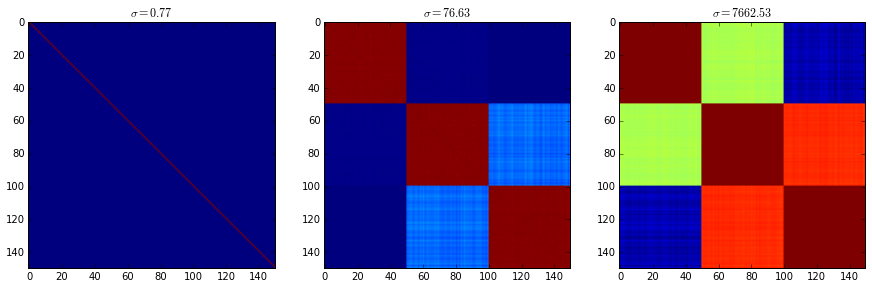

In [2]:
sigma = sigma_gak(X)

pylab.figure(figsize=(15, 5))
for i, sigma in enumerate([sigma / 100, sigma, 100 * sigma]):
    pylab.subplot(1, 3, i + 1)
    pylab.imshow(cdist_gak(X, sigma=sigma))
    pylab.title("$\sigma = %.2f$" % sigma)
pylab.show();

As seen above, the value selected by `sigma_gak` (which corresponds to the middle Gram matrix) tends to pick reasonable values for the bandwidth parameter.

Now, we can fit a kernel $k$-means and observe the resulting clustering of the data.

Init 1
Resumed because of empty cluster
Init 2
Resumed because of empty cluster
Init 3
Resumed because of empty cluster
Init 4
Resumed because of empty cluster
Init 5
Resumed because of empty cluster
Init 6
Resumed because of empty cluster
Init 7
Resumed because of empty cluster
Init 8
Resumed because of empty cluster
Init 9
Resumed because of empty cluster
Init 10
0.097 --> 0.000 --> 0.000 --> 


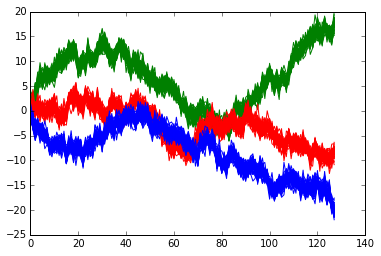

In [3]:
gak_km = GlobalAlignmentKernelKMeans(n_clusters=3, sigma=sigma, n_init=10)
y_pred = gak_km.fit_predict(X)

if gak_km.X_fit_ is not None:
    own_colors = ["r", "g", "b"]
    pylab.figure()
    for xx, yy in zip(X, y_pred):
        pylab.plot(numpy.arange(128), xx, own_colors[yy] + "-")
    pylab.show()

## $k$-means (Euclidean or DBA)

In practice, for this very simple dataset in which there is no time delay, standard $k$-means could do the job. Unfortunately, `KMeans` implementation from `sklearn` would not accept 3d arrays as inputs. `tslearn` hence provides a convenience `TimeSeriesKMeans` class that does the reshaping job for you:

Init 1
237.917 --> 122.977 --> 122.977 --> 
Init 2
230.422 --> 122.977 --> 122.977 --> 
Init 3
227.196 --> 122.977 --> 122.977 --> 
Init 4
233.299 --> 122.977 --> 122.977 --> 
Init 5
233.240 --> 122.977 --> 122.977 --> 


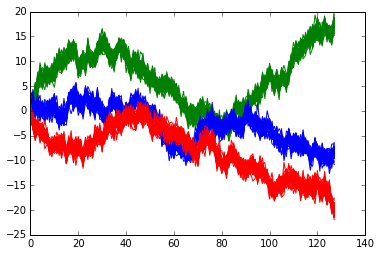

In [4]:
from tslearn.clustering import TimeSeriesKMeans
km = TimeSeriesKMeans(n_clusters=3, n_init=5, verbose=True)
y_pred = km.fit_predict(X)

own_colors = ["r", "g", "b"]
pylab.figure()
for xx, yy in zip(X, y_pred):
    pylab.plot(numpy.arange(128), xx, own_colors[yy] + "-")
pylab.show()

`TimeSeriesKMeans` class also allows for DTW-based $k$-means (using DBA method from Petitjean _et al._, see the documentation about `tslearn.barycenters.DTWBarycenterAveraging` for more information):

Init 1
107.350 --> 68.831 --> 68.831 --> 
Init 2
103.627 --> 68.831 --> 68.831 --> 
Init 3
102.317 --> 68.831 --> 68.831 --> 
Init 4
102.964 --> 68.831 --> 68.831 --> 
Init 5
106.453 --> 68.831 --> 68.831 --> 


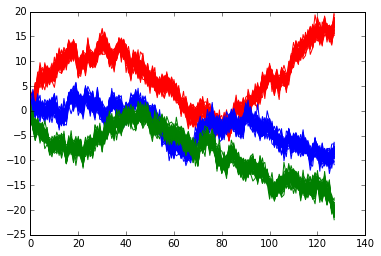

In [5]:
from tslearn.clustering import TimeSeriesKMeans
km = TimeSeriesKMeans(n_clusters=3, n_init=5, metric="dtw", verbose=True)
y_pred = km.fit_predict(X)

own_colors = ["r", "g", "b"]
pylab.figure()
for xx, yy in zip(X, y_pred):
    pylab.plot(numpy.arange(128), xx, own_colors[yy] + "-")
pylab.show()

## KShape

`tslearn.clustering` also implements the $k$-Shape clustering nethod that is based on cross-correlations between time series. Note that this clustering algorithm only accepts mono-dimensional time series datasets.

Init 1
0.052 --> 0.013 --> 0.010 --> 0.010 --> 0.011 --> 
Init 2
Resumed because of empty cluster
Init 3
0.028 --> 0.011 --> 0.011 --> 
Init 4
0.078 --> 0.051 --> 0.048 --> 0.046 --> 0.045 --> 0.044 --> 0.042 --> 0.040 --> 0.039 --> 0.038 --> 0.037 --> 0.036 --> 0.035 --> 0.035 --> 0.034 --> 0.034 --> 0.033 --> 0.033 --> 0.033 --> 0.033 --> 0.033 --> 
Init 5
0.028 --> 0.007 --> 0.008 --> 
Init 6
0.058 --> 0.015 --> 0.016 --> 
Init 7
Resumed because of empty cluster
Init 8
Resumed because of empty cluster
Init 9
Resumed because of empty cluster
Init 10
Resumed because of empty cluster


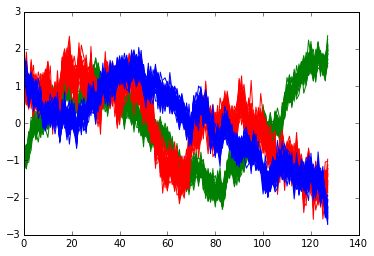

In [6]:
from tslearn.clustering import KShape
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

# KShape works on z-normalized time series
X = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(X)
ks = KShape(n_clusters=3, n_init=10)
y_pred = ks.fit_predict(X)

own_colors = ["r", "g", "b"]
pylab.figure()
for xx, yy in zip(X, y_pred):
    pylab.plot(numpy.arange(128), xx, own_colors[yy] + "-")
pylab.show()